## End Of Distribution Imputation :

End of Distribution imputation is a technique used to handle missing data in a dataset. In simple terms, it involves replacing the missing values with values that are considered very unusual or rare in the dataset. These unusual values are typically located at the far end of the distribution of the data, which means they are much higher or much lower than most of the other values.

Here's how it works:

1. First, you look at the distribution of the data, which is basically a way of showing how the values are spread out. You might use statistics like the mean (average) and standard deviation to understand this distribution.

2. You identify values that are really far away from the average, specifically, values that are more than 3 times the standard deviation away from the mean. These are considered extreme or rare values in the dataset.

3. When you encounter missing data (empty or null values) in your dataset, instead of leaving them empty, you replace them with these extreme values. By doing this, you are essentially saying that the missing values are as extreme as the most unusual values in your dataset.

This method is used when you think that missing data might carry some important information and you don't want to just ignore it. It can help to maintain the overall statistical characteristics of the data, but it's important to be cautious because it might not always be the best approach, especially if the missing data is not truly related to extreme values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
dataframe.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
dataframe.tail()

,Survived,Age,Fare
886,0,27.0,13.00
887,1,19.0,30.00
888,0,NaN,23.45
889,1,26.0,30.00
890,0,32.0,7.75


In [6]:
dataframe.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

There is 177 null values are present in dataset

In [7]:
mean = dataframe['Age'].mean()
mean

29.69911764705882

mean of Age Feature

In [8]:
std = dataframe['Age'].std()
std

14.526497332334044

stander deviation of Age Feature

To find the extreme or far end values for the Age feature using the mean and standard deviation, you can use the formula you mentioned:

Extreme Value = (Mean of Age Feature) + (3 * Standard Deviation of Age Feature)

Here's how it works:

1. Calculate the Mean of the Age feature, which is the average age of the data points.

2. Calculate the Standard Deviation of the Age feature, which measures how spread out the age values are from the mean.

3. Multiply the Standard Deviation by 3. This is used to determine how far from the mean you want to consider values as extreme. A factor of 3 is often chosen, but you can adjust it based on your specific needs or the characteristics of your data.

4. Add the result from step 3 to the Mean. This gives you a threshold value, and any Age value greater than this threshold is considered an extreme value or far end value.


In [9]:
extreme = (mean + (3*std))
extreme

73.27860964406095

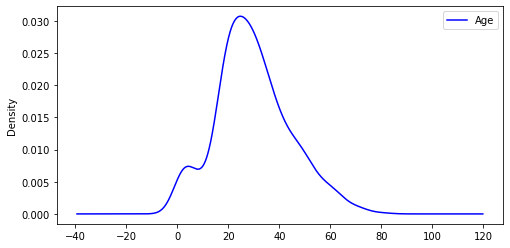

In [10]:
plt.figure(figsize = (8,4))
dataframe.Age.plot(kind = 'kde' ,
                   color = 'b')
plt.legend()

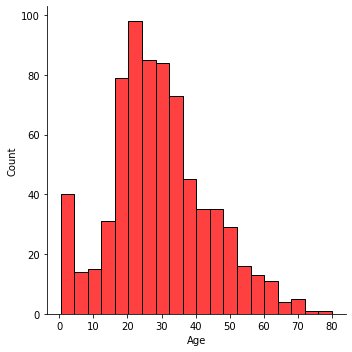

In [11]:
sns.displot(dataframe['Age'], color='r')

<AxesSubplot:>

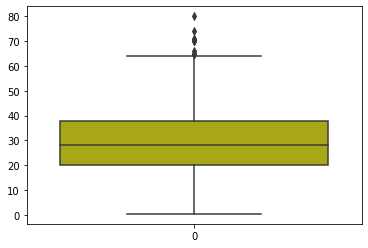

In [12]:
sns.boxplot(dataframe['Age'],color='y')

from both plots we can see that extrame values are between ~ 70 to 80 in other word it is a outliers

In [13]:
def End_distribution(df,variable,extreme):
    df[variable+'_median'] = df[variable].fillna(df[variable].median())
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)

In [15]:
End_distribution(dataframe,'Age',extreme)

In [16]:
dataframe.head()

,Survived,Age,Fare,Age_median,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


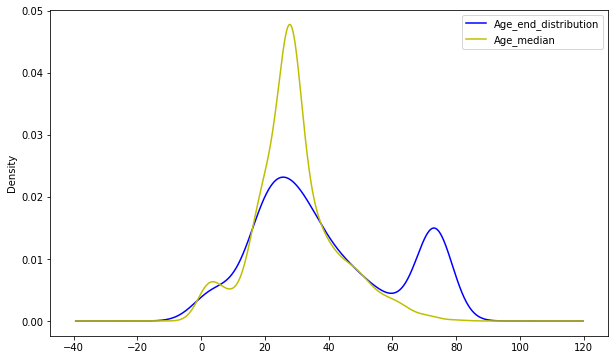

In [17]:
plt.figure(figsize = (10,6))
dataframe.Age_end_distribution.plot(kind = 'kde',
                                    color = 'b')
dataframe.Age_median.plot(kind= 'kde', color = 'y')
plt.legend()

<AxesSubplot:>

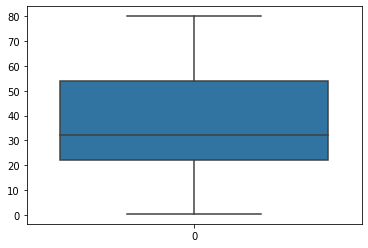

In [18]:
sns.boxplot(dataframe['Age_end_distribution'])

In short, when you replace missing values with the median, it can distort the data if you have outliers. Using the End of Distribution method for imputation, by replacing missing values with extreme values, can help overcome this distortion and better handle outliers in your dataset.